In [ ]:
#---------------------------------------------------------------------------------------------
# load the libraries that are required for this project:
#---------------------------------------------------------------------------------------------
import sys
import numpy as np              
import os                       
import pandas as pd             
import matplotlib               
import matplotlib.pyplot as plt 
import time  
import tensorflow as tf         # Tensorflow from Google
from tensorflow import keras    # Keras library from Tensorflow
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, auc
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, completeness_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import silhouette_score, completeness_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving octmnist.npz to octmnist.npz


In [ ]:
import time                     # Time is for estimating the computational time of every operation
import pandas as pd             # Pandas is for data analysis and structure manipulation
import numpy as np              # NumPy is for numerical operations
import matplotlib               # MatPlotLib is for making plots & figures
import matplotlib.pyplot as plt # PyPlot is a subset of the library for making MATLAB-style plots
import tensorflow as tf         # TensorFlow is for the neural networks
from tensorflow import keras    # Keras is for interfacing neural networks

## Important check: Let me see if my machine is using a GPU (i.e., TensorFlow-GPU is in use).
## If so, I may need to enable the use of memory in each GPU
phys_gpus = tf.config.list_physical_devices('GPU')
if phys_gpus:
    print('%d GPUs AVAILABLE' %(len(phys_gpus)))
    for gpu in phys_gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
else:
    print('GPU NOT AVAILABLE')

## Let us setup the font size
plt.rcParams['axes.labelsize']  = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

## Disable warnings
import warnings
warnings.filterwarnings("ignore")

GPU NOT AVAILABLE


**Import dataset and perform data preparation**

In [ ]:
list_files = np.load('octmnist.npz')
for name in list_files:
  print(name)
  print(np.shape(list_files[name]))

train_images
(97477, 28, 28)
val_images
(10832, 28, 28)
test_images
(1000, 28, 28)
train_labels
(97477, 1)
val_labels
(10832, 1)
test_labels
(1000, 1)


In [ ]:
train_images = list_files['train_images']
train_labels = list_files['train_labels']

test_images = list_files['test_images']
test_labels = list_files['test_labels']

val_images = list_files['val_images']
val_labels = list_files['val_labels']

In [ ]:
x = np.concatenate((train_images, test_images, val_images), axis= 0)
y = np.concatenate((train_labels, test_labels, val_labels), axis = 0)

In [ ]:
x_re = x.reshape(109309, -1)
y_re = y.reshape(109309, -1)

In [ ]:
x_df = pd.DataFrame(x_re)

3    51390
0    37455
1    11598
2     8866
Name: Class, dtype: int64


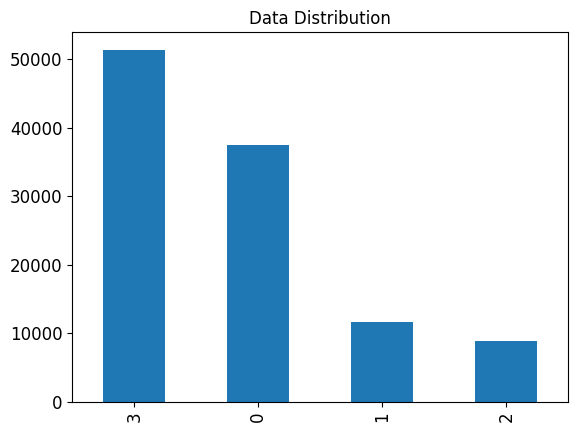

In [ ]:
y_df = pd.DataFrame(y_re, columns = ['Class'])
print(y_df['Class'].value_counts())
y_df['Class'].value_counts().plot(kind='bar', title = 'Data Distribution')
from imblearn.datasets import make_imbalance
x_red, y_red = make_imbalance(x_df, y_df, sampling_strategy= {0: 8866, 1: 8866, 2: 8866, 3: 8866}, random_state=35)

In [ ]:
print(np.shape(x_red))
print(np.shape(y_red))

(35464, 784)
(35464, 1)


<Axes: title={'center': 'Data Distribution'}>

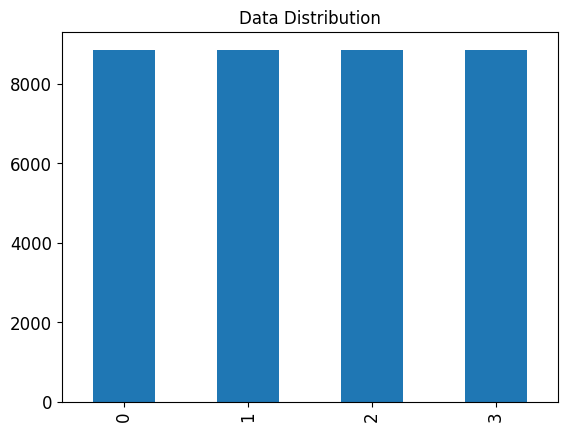

In [ ]:
y_red['Class'].value_counts().plot(kind='bar', title = 'Data Distribution')

In [ ]:
x_red = x_red.to_numpy()

In [ ]:
y_red = y_red.to_numpy()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit as strata
split_info = strata(n_splits =1, test_size = 1000, random_state = 35)

for train_index, test_index in split_info.split(x_red, y_red):
  X_train = x_red[train_index, :]
  x_test = x_red[test_index, :]
  Y_train = y_red[train_index, :]
  y_test = y_red[test_index, :]

In [ ]:
split_info_2 = strata(n_splits =1, test_size = .2, random_state = 35)

for train_index, test_index in split_info_2.split(X_train, Y_train):
  x_train = X_train[train_index, :]
  x_val = X_train[test_index, :]
  y_train = Y_train[train_index, :]
  y_val = Y_train[test_index, :]

# NN

In [ ]:
## Reset the random seed in TensorFlow to keep the results consistent across runs
keras.backend.clear_session()
np.random.seed(36)
tf.random.set_seed(36)
earlystop_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [ ]:
X_train = x_train / 255.
X_test = x_test / 255.
X_val = x_test / 255.

PCA

In [ ]:
from sklearn.decomposition import PCA
pca_99 = PCA(n_components = 88)

X_train_pca = pca_99.fit_transform(X_train)
X_val_pca = pca_99.transform(X_val)
X_test_pca = pca_99.transform(X_test)

In [ ]:
X_train_pca1 = X_train_pca[:20000,:]
y_train1 = y_train[:20000]

Deep DNN

In [ ]:
DNN1 = keras.models.Sequential([
    keras.layers.Dense(256, activation='relu', input_dim=88),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(4, activation='softmax')
])

## Compile the network model
DNN1.compile(loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

## Print out the structure of the network
DNN1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 256)               22784     
                                                                 
 batch_normalization_33 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dense_43 (Dense)            (None, 256)               65792     
                                                                 
 dropout_29 (Dropout)        (None, 256)               0         
                                                                 
 batch_normalization_34 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dense_44 (Dense)            (None, 256)              

In [ ]:
n_epochs = 15
earlystop_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
training_DNN1= DNN1.fit(X_train_pca, y_train, epochs=n_epochs,validation_split=0.2,
                           verbose=1,
                           callbacks=[earlystop_cb])

## Test the optimal network
scores2= DNN1.evaluate(X_test_pca,y_test,verbose=0)

## Plot the accuracy score versus the epochs and marks the accuracy on the test data
accuracy_DNN1= training_DNN1.history.get('val_accuracy')

Epoch 1/15
690/690 [==============================] - 9s 10ms/step - loss: 1.5525 - accuracy: 0.2677 - val_loss: 1.3314 - val_accuracy: 0.3563
Epoch 2/15
690/690 [==============================] - 8s 11ms/step - loss: 1.3158 - accuracy: 0.3437 - val_loss: 1.2076 - val_accuracy: 0.4337
Epoch 3/15
690/690 [==============================] - 8s 12ms/step - loss: 1.2200 - accuracy: 0.4200 - val_loss: 1.1026 - val_accuracy: 0.5160
Epoch 4/15
690/690 [==============================] - 7s 11ms/step - loss: 1.1240 - accuracy: 0.4999 - val_loss: 1.0132 - val_accuracy: 0.5726
Epoch 5/15
690/690 [==============================] - 8s 12ms/step - loss: 1.0283 - accuracy: 0.5558 - val_loss: 0.9535 - val_accuracy: 0.6053
Epoch 6/15
690/690 [==============================] - 7s 10ms/step - loss: 0.9683 - accuracy: 0.5940 - val_loss: 0.9296 - val_accuracy: 0.6238
Epoch 7/15
690/690 [==============================] - 8s 11ms/step - loss: 0.9192 - accuracy: 0.6206 - val_loss: 0.9056 - val_accuracy: 0.6446

Shallow NN found based on optimization

Done in another Notebook

In [ ]:
def dnn_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[784]):
    dnn_clf = keras.models.Sequential()
    dnn_clf.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        dnn_clf.add(keras.layers.Dense(n_neurons, activation="relu"))
    dnn_clf.add(keras.layers.Dense(4, activation="softmax"))
    optimfcn = keras.optimizers.RMSprop(learning_rate=learning_rate)
    dnn_clf.compile(loss="sparse_categorical_crossentropy", optimizer=optimfcn, metrics=["accuracy"])
    return dnn_clf

# create a wrapper to use the DNN as any other classifier in scikit-learn
clftemp = keras.wrappers.scikit_learn.KerasClassifier(dnn_model)

# set the range of parameters to test
param_distribs = {
    "n_hidden": [2, 3, 4],
    "n_neurons": np.arange(10, 300, 50).tolist(),
    "learning_rate": np.logspace(-4, -2,num=5).tolist(),
}

print("done!")

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# create callbacks to make the training more efficient:
#
#   1) a callback function is used to store parameters at the end of each epoch
checkpoint_cb = keras.callbacks.ModelCheckpoint("model_trained.h5")

#   2) a callback function is used to early stop training if no improvement happens for 5 epochs
earlystop_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# two options are provided for grid search:
#
#    a) grid search       -> all combinations of parameter values are tested
#    b) randomized search -> a handful (i.e., n_iter) of combinations are randomly chosen and tested
#
# SELECT ONE OF THESE TWO:
#
search_cv = GridSearchCV(clftemp, param_distribs, scoring='accuracy',cv=3, verbose=1)

# run the grid search
search_cv.fit(X_train[:30000,:], y_train[:30000],
              epochs = 30,
              validation_data = (X_test1, y_test),
              verbose = 1,
              callbacks=[earlystop_cb, checkpoint_cb])
print(search_cv.best_params_)
print('done!')

In [ ]:
DNN2 = keras.models.Sequential([
    keras.layers.Dense(160, activation='relu', input_dim=88),
    keras.layers.Dense(160, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])

## Compile the network model
DNN2.compile(loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

## Print out the structure of the network
DNN2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 160)               14240     
                                                                 
 dense_49 (Dense)            (None, 160)               25760     
                                                                 
 dense_50 (Dense)            (None, 4)                 644       
                                                                 
Total params: 40,644
Trainable params: 40,644
Non-trainable params: 0
_________________________________________________________________


In [ ]:
n_epochs = 25
earlystop_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
training_DNN2= DNN2.fit(X_train_pca, y_train, epochs=n_epochs,validation_split=0.2,
                           verbose=0,
                           callbacks=[earlystop_cb])

## Test the optimal network
scores3= DNN2.evaluate(X_test_pca,y_test,verbose=0)

## Plot the accuracy score versus the epochs and marks the accuracy on the test data
accuracy_DNN2= training_DNN2.history.get('val_accuracy')

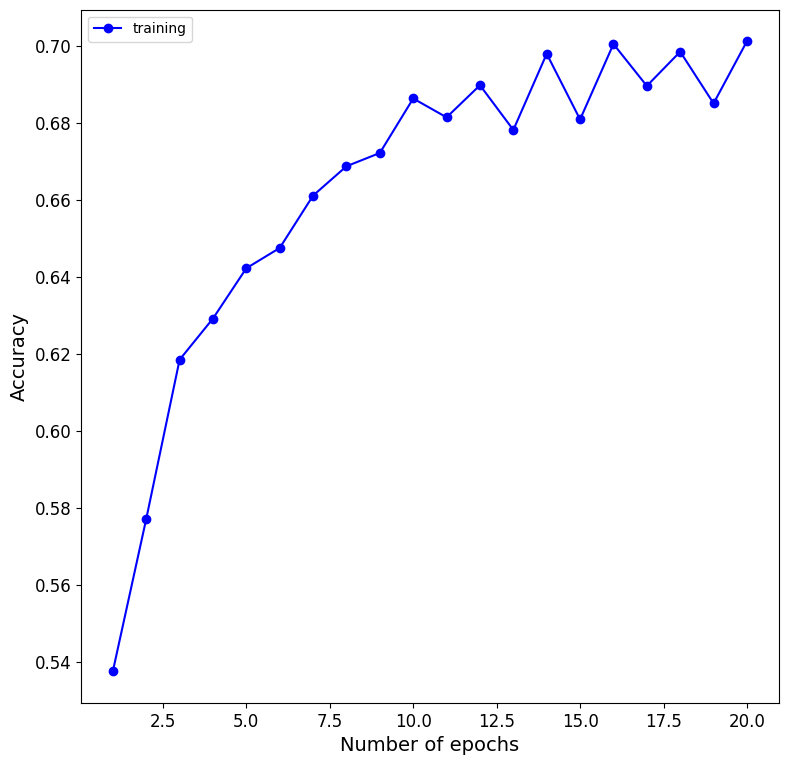

In [ ]:
## Step 3: Test the network
scores2 = DNN2.evaluate(X_test_pca,y_test,verbose=0)
vals2 = training_DNN2.history.get('val_accuracy')

## Plot the accuracy score versus the epochs and marks the accuracy on the test data
plt.figure(figsize=(9,9))
plt.plot(range(1,len(vals2)+1), vals2, color='b', marker='o',label='training')
#plt.plot([1, len(vals2)], [scores2[1], scores2[1]], linestyle='dotted', color='r', label=('test (%1.4f)' %(scores2[1])))
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Deep Network

In [ ]:
DNN3 = keras.models.Sequential([
    keras.layers.Dense(160, activation='relu', input_dim=88),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(4, activation='softmax')
])
     

## Compile the network model
DNN3.compile(loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

## Print out the structure of the network
DNN3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 160)               14240     
                                                                 
 dropout_17 (Dropout)        (None, 160)               0         
                                                                 
 batch_normalization_19 (Bat  (None, 160)              640       
 chNormalization)                                                
                                                                 
 dense_26 (Dense)            (None, 64)                10304     
                                                                 
 dropout_18 (Dropout)        (None, 64)                0         
                                                                 
 batch_normalization_20 (Bat  (None, 64)               256       
 chNormalization)                                     

In [ ]:
n_epochs = 15
earlystop_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
training_DNN3= DNN3.fit(X_train_pca, y_train, epochs=n_epochs,validation_split=0.2,
                           verbose=0,
                           callbacks=[earlystop_cb])

## Test the optimal network
scores3= DNN3.evaluate(X_test_pca,y_test,verbose=0)

## Plot the accuracy score versus the epochs and marks the accuracy on the test data
accuracy_DNN3= training_DNN3.history.get('val_accuracy')

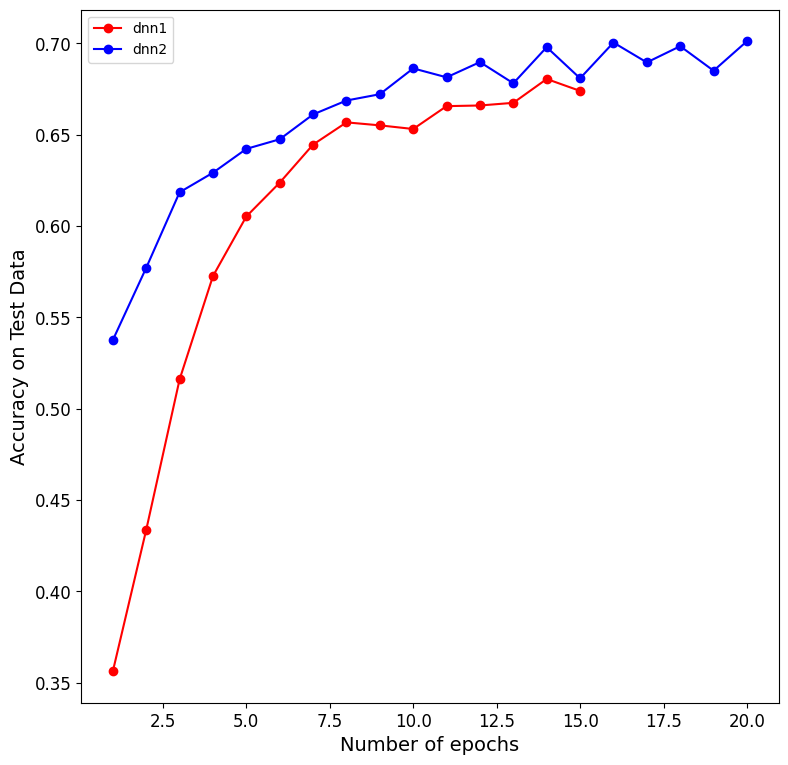

In [ ]:
# plot the accuracy on the test data at the end of every epoch

plt.figure(figsize=(9,9))
plt.plot(range(1,len(accuracy_DNN1)+1), accuracy_DNN1, color='r', marker='o',label='dnn1')
plt.plot(range(1,len(accuracy_DNN2)+1), accuracy_DNN2, color='b', marker='o',label='dnn2')



plt.xlabel('Number of epochs')
plt.ylabel('Accuracy on Test Data')
plt.legend()
plt.show()

Conv1D instead of PCA

In [ ]:
DNN4 = keras.models.Sequential([
    keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', strides=1, padding='same',input_shape=(784,1)),
    keras.layers.Flatten(), 
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(4, activation='softmax')
])
     

## Compile the network model
DNN4.compile(loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

## Print out the structure of the network
DNN4.summary()

In [ ]:
n_epochs = 15
earlystop_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
training_DNN4= DNN4.fit(X_train, y_train, epochs=n_epochs,validation_split=0.2,
                           verbose=0,
                           callbacks=[earlystop_cb])

## Test the optimal network
scores4= DNN4.evaluate(X_test,y_test,verbose=0)

## Plot the accuracy score versus the epochs and marks the accuracy on the test data
accuracy_DNN4= training_DNN4.history.get('val_accuracy')

In [ ]:
# plot the accuracy on the test data at the end of every epoch

plt.figure(figsize=(9,9))
plt.plot(range(1,len(accuracy_DNN1)+1), accuracy_DNN1, color='r', marker='o',label='dnn1')
plt.plot(range(1,len(accuracy_DNN2)+1), accuracy_DNN2, color='b', marker='o',label='dnn2')
plt.plot(range(1,len(accuracy_DNN3)+1), accuracy_DNN3, color='b', marker='o',label='dnn3')
plt.plot(range(1,len(accuracy_DNN4)+1), accuracy_DNN4, color='b', marker='o',label='dnn4')





plt.xlabel('Number of epochs')
plt.ylabel('Accuracy on Test Data')
plt.legend()
plt.show()



---



CNN

In [ ]:
import numpy as np              # NumPy is for numerical operations
import os                       # OS is for interfacing your own operative system
import time                     # Time is for estimating the computational time of every operation
import tensorflow as tf         # TensorFlow is for the neural networks
import matplotlib               # MatPlotLib is for making plots & figures
import matplotlib.pyplot as plt # PyPlot is a subset of the library for making MATLAB-style plots


# instructions to make the script working on GPU
gpus= tf.config.experimental.list_physical_devices('GPU')
for gpu_instance in gpus:
    print(gpu_instance)
    tf.config.experimental.set_memory_growth(gpu_instance, True)

In [ ]:
X_train1 = x_train.reshape((27571,28,28))
X_test1 = x_test.reshape((1000,28,28))
X_val1 = x_val.reshape((6893,28,28))
X_train1 = np.expand_dims(X_train1, axis=3)
X_test1 = np.expand_dims(X_test1, axis=3)
X_val1 = np.expand_dims(X_val1, axis=3)
print(np.shape(X_train1))
print(np.shape(X_test1))
print(np.shape(X_val1))

(27571, 28, 28, 1)
(1000, 28, 28, 1)
(6893, 28, 28, 1)


In [ ]:
X_train1 = X_train1/255
X_test1 = X_test1/255
X_val1 = X_val1/255

In [ ]:

#   2) a callback function is used to early stop training if no improvement happens for 5 epochs
earlystop_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 dense_51 (Dense)            (None, 160)               1003680   
                                                                 
 batch_normalization_38 (Bat  (None, 160)              640       
 chNormalization)                                                
                                                                 
 dropout_33 (Dropout)        (None, 160)             

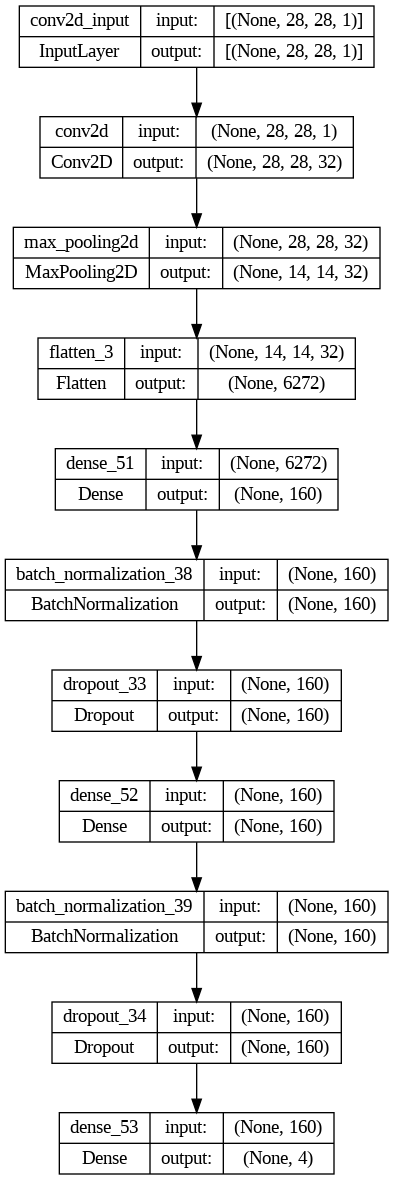

In [ ]:
cnn1 = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding="same", input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(2, strides=2, padding="valid"),
    keras.layers.Flatten(), 
    keras.layers.Dense(160, activation="relu", kernel_initializer="lecun_normal"), 
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5), 
    keras.layers.Dense(160, activation="relu", kernel_initializer="lecun_normal"), 
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4, activation="softmax")])

# compile the network model: this step will configure the learning process
cnn1.compile(loss="sparse_categorical_crossentropy",optimizer="nadam",metrics=["accuracy"])

# print out the structure of the network
cnn1.summary()

# plot the structure of the network in a graph
keras.utils.plot_model(cnn1, show_shapes=True)

In [ ]:
#tf.debugging.set_log_device_placement(True)

# Train the convolutional network
n_epochs = 15
training_cnn1 = cnn1.fit(X_train1, y_train,
                     epochs=n_epochs,
                     validation_split=0.2,
                     callbacks=[earlystop_cb])

Epoch 1/15
690/690 [==============================] - 48s 64ms/step - loss: 1.5024 - accuracy: 0.3763 - val_loss: 2.2497 - val_accuracy: 0.2618
Epoch 2/15
690/690 [==============================] - 36s 52ms/step - loss: 1.0019 - accuracy: 0.5700 - val_loss: 1.0224 - val_accuracy: 0.5443
Epoch 3/15
690/690 [==============================] - 32s 46ms/step - loss: 0.9305 - accuracy: 0.6119 - val_loss: 1.2730 - val_accuracy: 0.4968
Epoch 4/15
690/690 [==============================] - 38s 55ms/step - loss: 0.8926 - accuracy: 0.6280 - val_loss: 0.9921 - val_accuracy: 0.5594
Epoch 5/15
690/690 [==============================] - 38s 55ms/step - loss: 0.8706 - accuracy: 0.6394 - val_loss: 0.8546 - val_accuracy: 0.6597
Epoch 6/15
690/690 [==============================] - 38s 55ms/step - loss: 0.8471 - accuracy: 0.6497 - val_loss: 2.0070 - val_accuracy: 0.4374
Epoch 7/15
690/690 [==============================] - 31s 44ms/step - loss: 0.8137 - accuracy: 0.6702 - val_loss: 1.4021 - val_accuracy:

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 12544)             0         
                                                                 
 dense_54 (Dense)            (None, 64)                802880    
                                                                 
 batch_normalization_40 (Bat  (None, 64)               256       
 chNormalization)                                    

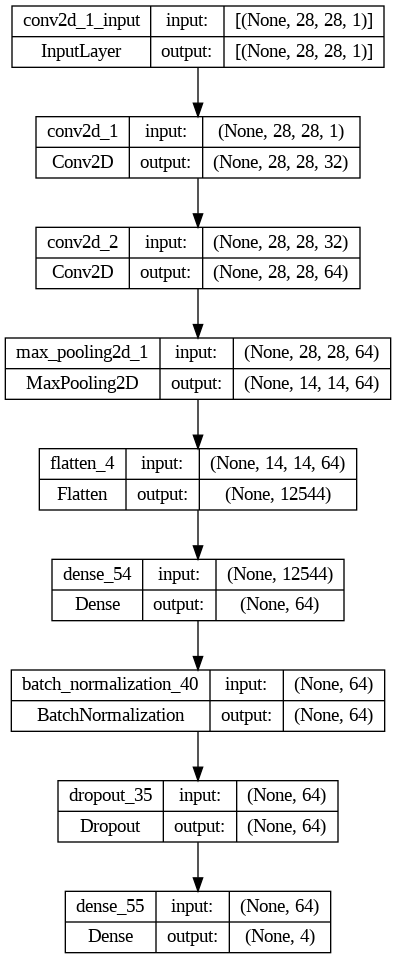

In [ ]:
# Define the CNN architecture
cnn2 = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding="same", input_shape=[28,28,1]),
    keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding="same"), 
    keras.layers.MaxPooling2D(2, strides=2, padding="valid"),
    keras.layers.Flatten(), 
    keras.layers.Dense(64, activation="relu", kernel_initializer="lecun_normal"), 
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5), 
    keras.layers.Dense(4, activation="softmax")])

sgdmeth = keras.optimizers.SGD(learning_rate=0.0005, momentum=0.9, nesterov=True)
# compile the network model: this step will configure the learning process
cnn2.compile(loss="sparse_categorical_crossentropy",optimizer=sgdmeth,metrics=["accuracy"])

# print out the structure of the network
cnn2.summary()

# plot the structure of the network in a graph
keras.utils.plot_model(cnn2, show_shapes=True)

In [ ]:
#tf.debugging.set_log_device_placement(True)

# Train the convolutional network
n_epochs = 15
training = cnn2.fit(X_train1, y_train,
                     epochs=n_epochs,
                     validation_split=0.2,
                     callbacks=[earlystop_cb])

Epoch 1/15
690/690 [==============================] - 95s 136ms/step - loss: 1.2836 - accuracy: 0.3969 - val_loss: 1.1676 - val_accuracy: 0.4901
Epoch 2/15
690/690 [==============================] - 107s 156ms/step - loss: 1.0709 - accuracy: 0.5422 - val_loss: 1.1173 - val_accuracy: 0.4678
Epoch 3/15
690/690 [==============================] - 86s 125ms/step - loss: 0.9506 - accuracy: 0.6087 - val_loss: 1.2330 - val_accuracy: 0.4633
Epoch 4/15
690/690 [==============================] - 94s 136ms/step - loss: 0.8615 - accuracy: 0.6484 - val_loss: 1.1221 - val_accuracy: 0.5630
Epoch 5/15
690/690 [==============================] - 93s 135ms/step - loss: 0.8173 - accuracy: 0.6683 - val_loss: 1.0716 - val_accuracy: 0.5480
Epoch 6/15
690/690 [==============================] - 91s 131ms/step - loss: 0.7802 - accuracy: 0.6869 - val_loss: 1.1066 - val_accuracy: 0.5744
Epoch 7/15
690/690 [==============================] - 88s 128ms/step - loss: 0.7608 - accuracy: 0.6970 - val_loss: 0.9519 - val_a

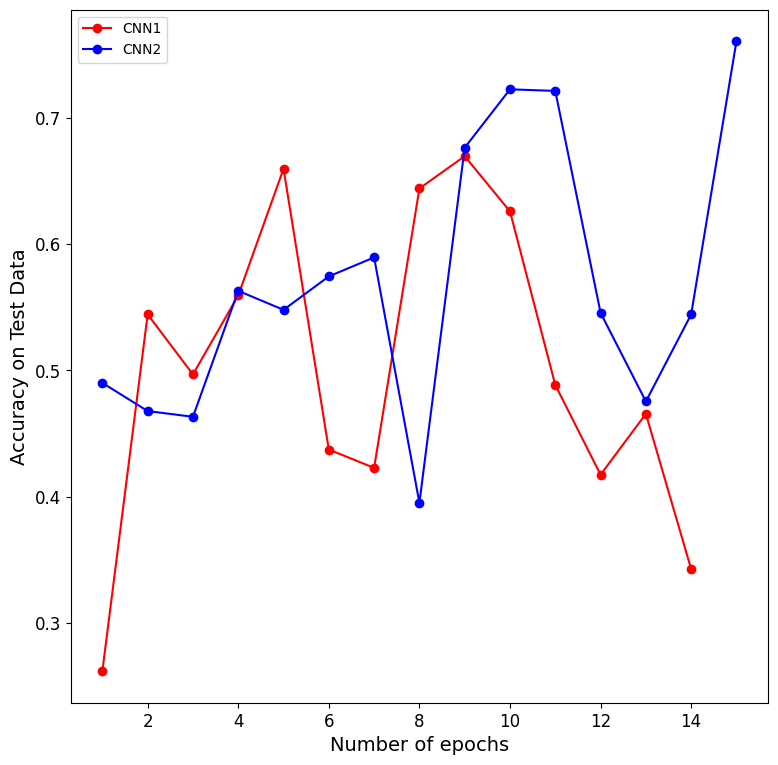

In [ ]:
# plot the accuracy on the test data at the end of every epoch
accuracy_score0 = training_cnn1.history.get('val_accuracy')
accuracy_score1 = training.history.get('val_accuracy')

plt.figure(figsize=(9,9))
plt.plot(range(1,len(accuracy_score0)+1), accuracy_score0, color='r', marker='o',label='CNN1')
plt.plot(range(1,len(accuracy_score1)+1), accuracy_score1, color='b', marker='o',label='CNN2')


plt.xlabel('Number of epochs')
plt.ylabel('Accuracy on Test Data')
plt.legend()
plt.show()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        1600      
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 25088)             0         
                                                                 
 dense_56 (Dense)            (None, 64)                1605696   
                                                     

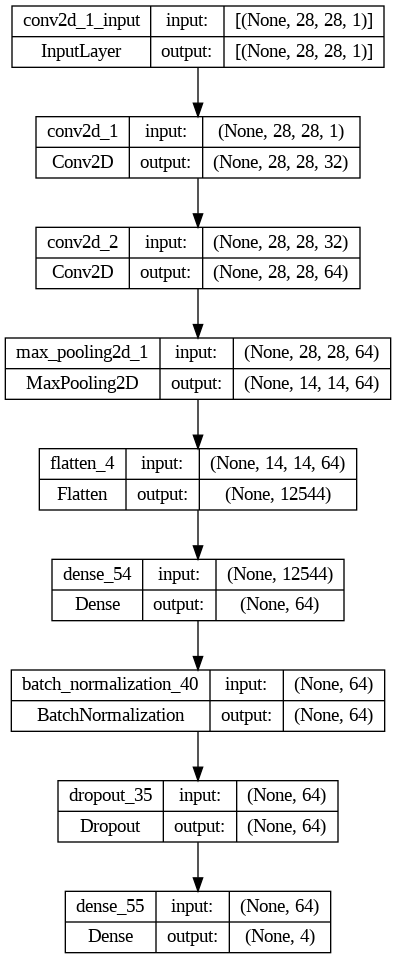

In [73]:
# Define the CNN architecture
cnn3 = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=7, activation="relu", padding="same", input_shape=[28,28,1]),
    keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding="same"),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding="same"), 
    keras.layers.MaxPooling2D(2, strides=2, padding="valid"),
    keras.layers.Flatten(), 
    keras.layers.Dense(64, activation="relu", kernel_initializer="lecun_normal"), 
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5), 
    keras.layers.Dense(4, activation="softmax")])

sgdmeth = keras.optimizers.SGD(learning_rate=0.0005, momentum=0.9, nesterov=True)
# compile the network model: this step will configure the learning process
cnn3.compile(loss="sparse_categorical_crossentropy",optimizer=sgdmeth,metrics=["accuracy"])

# print out the structure of the network
cnn3.summary()

# plot the structure of the network in a graph
keras.utils.plot_model(cnn2, show_shapes=True)

In [85]:
#tf.debugging.set_log_device_placement(True)

# Train the convolutional network
n_epochs = 15
training_3 = cnn3.fit(X_train1[:20000,:,:,:], y_train[:20000],
                     epochs=n_epochs,
                     validation_split=0.2,
                     callbacks=[earlystop_cb])

Epoch 1/15
500/500 [==============================] - 344s 688ms/step - loss: 0.7437 - accuracy: 0.7021 - val_loss: 0.9158 - val_accuracy: 0.6609
Epoch 2/15
500/500 [==============================] - 254s 508ms/step - loss: 0.7217 - accuracy: 0.7139 - val_loss: 1.0918 - val_accuracy: 0.5496
Epoch 3/15
500/500 [==============================] - 244s 488ms/step - loss: 0.7163 - accuracy: 0.7136 - val_loss: 1.1012 - val_accuracy: 0.5762
Epoch 4/15
500/500 [==============================] - 209s 419ms/step - loss: 0.6973 - accuracy: 0.7252 - val_loss: 0.9715 - val_accuracy: 0.5405
Epoch 5/15
500/500 [==============================] - 220s 439ms/step - loss: 0.6818 - accuracy: 0.7298 - val_loss: 0.8558 - val_accuracy: 0.6412
Epoch 6/15
500/500 [==============================] - 210s 420ms/step - loss: 0.6680 - accuracy: 0.7351 - val_loss: 0.9322 - val_accuracy: 0.6562
Epoch 7/15
500/500 [==============================] - 215s 430ms/step - loss: 0.6636 - accuracy: 0.7342 - val_loss: 0.7109 -

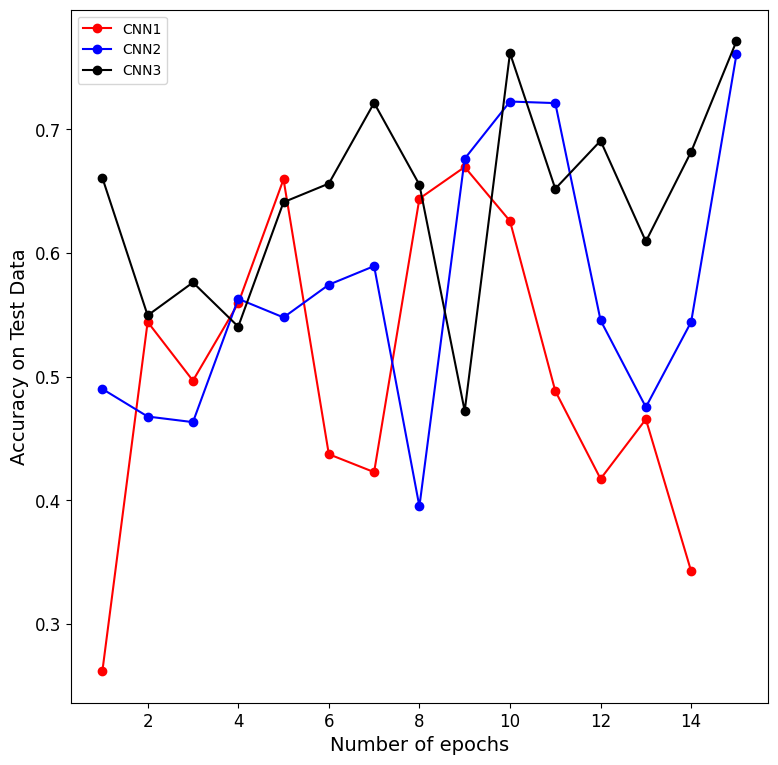

In [87]:
# plot the accuracy on the test data at the end of every epoch
accuracy_score0 = training_cnn1.history.get('val_accuracy')
accuracy_score1 = training.history.get('val_accuracy')
accuracy_score2 = training_3.history.get('val_accuracy')


plt.figure(figsize=(9,9))
plt.plot(range(1,len(accuracy_score0)+1), accuracy_score0, color='r', marker='o',label='CNN1')
plt.plot(range(1,len(accuracy_score1)+1), accuracy_score1, color='b', marker='o',label='CNN2')
plt.plot(range(1,len(accuracy_score1)+1), accuracy_score2, color='k', marker='o',label='CNN3')



plt.xlabel('Number of epochs')
plt.ylabel('Accuracy on Test Data')
plt.legend()
plt.show()



---



**Pretrained Models(Transfer Learning)** 



Vggnet

In [ ]:
from keras.layers import Input, Dense,Conv2D,MaxPooling2D,UpSampling2D,BatchNormalization
from keras.models import Model,Sequential
import keras.layers as layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
np.shape(X_train1)

(31016, 28, 28, 1)

In [ ]:
rgbImage = np.concatenate((X_train1, X_train1, X_train1),axis=3);


In [ ]:
np.shape(rgbImage)

(31016, 28, 28, 3)

In [ ]:
image = tf.image.resize_with_crop_or_pad(rgbImage, 32, 32)

In [ ]:
np.shape(image)

TensorShape([31016, 32, 32, 3])

In [ ]:
image=image.numpy()

In [ ]:
np.shape(image)

(31016, 32, 32, 3)

In [ ]:
np.shape(image)

(31016, 32, 32, 3)

In [ ]:
base_model = tf.keras.applications.VGG16(
    input_shape=(32,32,3), 
    include_top=False, 
    weights='imagenet'
)
base_model.trainable = False

np.random.seed(1)
tf.random.set_seed(1)

model_transfer = Sequential([
    base_model,
    BatchNormalization(),
    layers.Flatten(),
    Dense(128, activation='relu'),
    layers.Dropout(0.5),
    Dense(32, activation='relu'),
    layers.Dropout(0.5),
    BatchNormalization(),
    Dense(4, activation='sigmoid')
])

model_transfer.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 batch_normalization_11 (Bat  (None, 1, 1, 512)        2048      
 chNormalization)                                                
                                                                 
 flatten_13 (Flatten)        (None, 512)               0         
                                                                 
 dense_39 (Dense)            (None, 128)               65664     
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_40 (Dense)            (None, 32)                4128      
                                                     

In [ ]:
np.shape(Y_train1)

(31016, 4)

In [ ]:
from tensorflow.keras.utils import to_categorical
Y_train1 = to_categorical(Y_train1, 4)
y_test = to_categorical(y_test, 4)
y_train.shape

(31016, 4)

In [ ]:
print(Y_train1)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 ...
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]


In [ ]:
earlystop_cb = keras.callbacks.EarlyStopping(patience=8, restore_best_weights=True)
#optimizer
opt = tf.keras.optimizers.Adam(0.001)
# compile 
model_transfer.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=['accuracy', tf.keras.metrics.AUC()])
#fit
training_3 = model_transfer.fit(image,Y_train1,epochs = 20,validation_data = 0.2,verbose = 1,callbacks=[earlystop_cb])
#plot accuracy on train
accuracy_score3 = training_3.history.get('val_accuracy')
plt.figure(figsize=(10,7))
plt.plot(range(1,len(accuracy_score3)+1), accuracy_score3)
plt.legend()

Epoch 1/20
970/970 [==============================] - ETA: 0s - loss: 1.2153 - accuracy: 0.4567 - auc_11: 0.6957

IndexError: ignored

In [ ]:

model_transfer.evaluate(x_test,y_test)

pred=model_transfer.predict(x_test)



---



**Top Models**

1) DNN

In [ ]:
from sklearn.decomposition import PCA
pca_99 = PCA(n_components = 88)

X_train_pca = pca_99.fit_transform(X_train)
X_val_pca = pca_99.transform(X_val)
X_test_pca = pca_99.transform(X_test)

In [ ]:
DNN2 = keras.models.Sequential([
    keras.layers.Dense(160, activation='relu', input_dim=88),
    keras.layers.Dense(160, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])

## Compile the network model
DNN2.compile(loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

## Print out the structure of the network
DNN2.summary()

In [ ]:
n_epochs = 25
earlystop_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
training_DNN2= DNN2.fit(X_train_pca, y_train, epochs=n_epochs,validation_split=0.2,
                           verbose=0,
                           callbacks=[earlystop_cb])

## Test the optimal network
scores3= DNN2.evaluate(X_test_pca,y_test,verbose=0)

## Plot the accuracy score versus the epochs and marks the accuracy on the test data
accuracy_DNN2= training_DNN2.history.get('val_accuracy')

32/32 [==============================] - 0s 2ms/step
DNN (Final): ACC = 0.6850


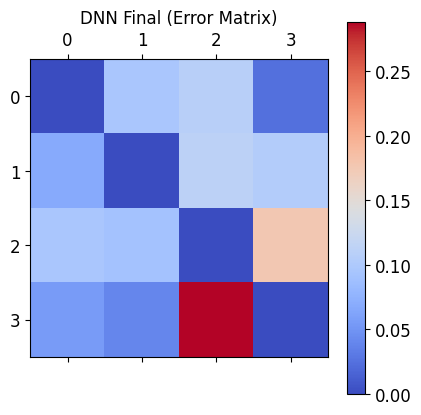

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

Y_pred1 = np.argmax(DNN2.predict(X_test_pca), axis=-1)
Y_pred_proba1 = DNN2.predict(X_test_pca)

## Report the accuracy and Error matrix
print('DNN (Final): ACC = %1.4f' % (accuracy_score(y_test, Y_pred1)))
    
CM0 = confusion_matrix(y_test, Y_pred1)
CM0 = CM0.astype('float') / CM0.sum(axis=1)[:, np.newaxis]   
np.fill_diagonal(CM0,0)
plt.matshow(CM0, cmap=plt.cm.coolwarm)
plt.title('DNN Final (Error Matrix)')
plt.tight_layout
plt.colorbar()
plt.show()

## Let me save the predicted output values and the predicted probability values for future use
with open('repository_design1.npy', 'wb') as f:
    np.save(f, Y_pred1)
    np.save(f, Y_pred_proba1)

32/32 [==============================] - 0s 1ms/step


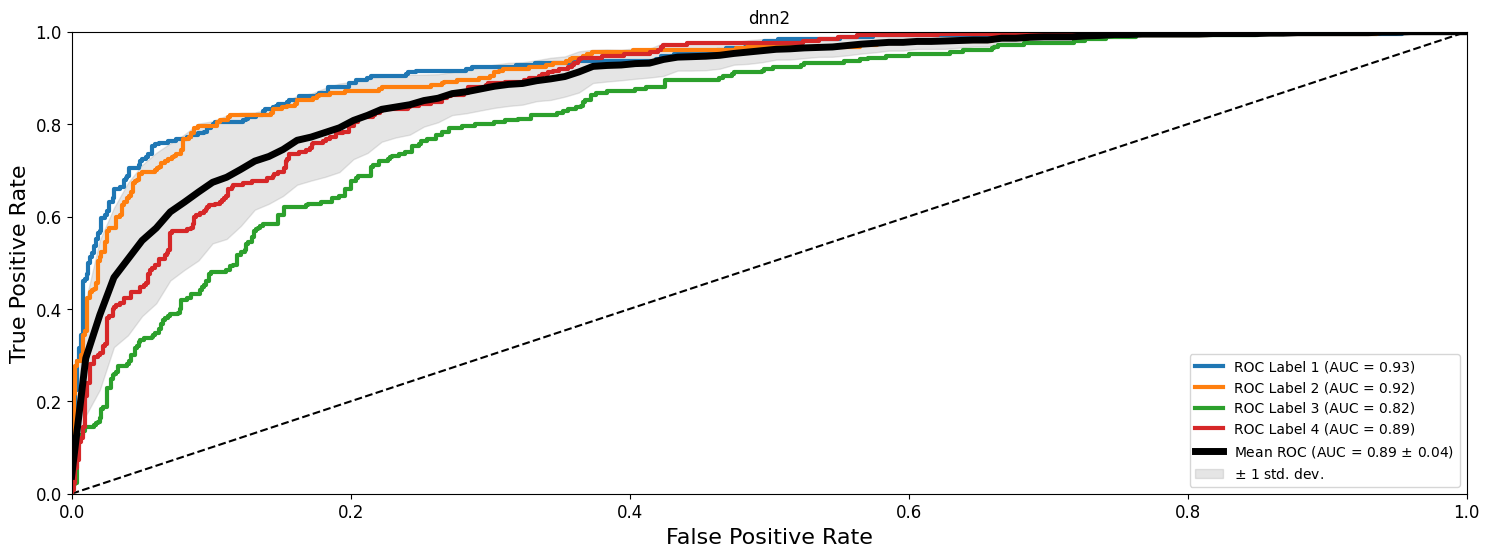

In [ ]:
from sklearn.preprocessing import label_binarize
Y_prob_A = DNN2.predict(X_test_pca)
# convert the output vector into a matrix of binary columns. This is neede2,14,15,1d to compute the ROC curve
Y_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
Fpr_mean = np.linspace(0, 1, 100)
tpr_mean = []
Fpr = []
Tpr = []
AUC = []
for i in range(0,4):
    fpr, tpr, T = roc_curve(Y_bin[:,i], Y_prob_A[:,i])
    AUC.append(roc_auc_score(Y_bin[:,i], Y_prob_A[:,i]))
    Fpr.append(fpr)
    Tpr.append(tpr)
    
    # add an interpolated version of Tpr for the mean ROC curve
    tpr_mean.append(np.interp(Fpr_mean, fpr, tpr))

Tpr_mean = np.mean(tpr_mean, axis=0)
Tpr_stdv = np.std(tpr_mean, axis=0)

mean_auc = auc(Fpr_mean, Tpr_mean)
std_auc = np.std(AUC)

# make the plot: frame
plt.figure(1, figsize=(18, 6))
plt.clf()
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('dnn2')
for i in range(0,4):
    plt.plot(Fpr[i],Tpr[i], linewidth=3, label=r'ROC Label %d (AUC = %0.2f)' % (i+1,AUC[i]))

# plot the average ROC curve
plt.plot(Fpr_mean, Tpr_mean, color='k', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), linewidth=5)

# plot the backround +/- SD around the average ROC curve
UB = np.minimum(Tpr_mean + Tpr_stdv, 1)
LB = np.maximum(Tpr_mean - Tpr_stdv, 0)
plt.fill_between(Fpr_mean, LB, UB, color='grey', alpha=0.2, label=r'$\pm$ 1 std. dev.')
plt.legend(loc="lower right")

2)CNN2

In [ ]:
X_train1 = x_train.reshape((27571,28,28))
X_test1 = x_test.reshape((1000,28,28))
X_val1 = x_val.reshape((6893,28,28))
X_train1 = np.expand_dims(X_train1, axis=3)
X_test1 = np.expand_dims(X_test1, axis=3)
X_val1 = np.expand_dims(X_val1, axis=3)
print(np.shape(X_train1))
print(np.shape(X_test1))
print(np.shape(X_val1))

In [ ]:
cnn2 = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding="same", input_shape=[28,28,1]),
    keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding="same"), 
    keras.layers.MaxPooling2D(2, strides=2, padding="valid"),
    keras.layers.Flatten(), 
    keras.layers.Dense(64, activation="relu", kernel_initializer="lecun_normal"), 
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5), 
    keras.layers.Dense(4, activation="softmax")])

sgdmeth = keras.optimizers.SGD(learning_rate=0.0005, momentum=0.9, nesterov=True)
# compile the network model: this step will configure the learning process
cnn2.compile(loss="sparse_categorical_crossentropy",optimizer=sgdmeth,metrics=["accuracy"])

# print out the structure of the network
cnn2.summary()

# plot the structure of the network in a graph
keras.utils.plot_model(cnn2, show_shapes=True)

32/32 [==============================] - 1s 27ms/step
DNN (Final): ACC = 0.7400


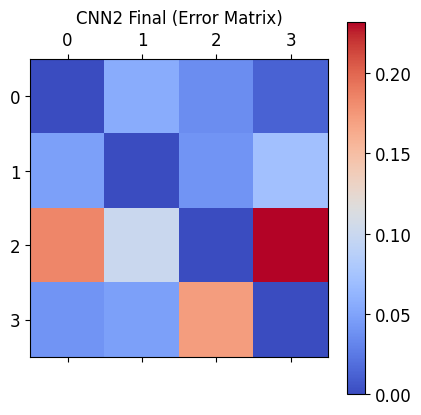

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

Y_pred2 = np.argmax(cnn2.predict(X_test1), axis=-1)
Y_pred_proba2 = cnn2.predict(X_test1)

## Report the accuracy and Error matrix
print('DNN (Final): ACC = %1.4f' % (accuracy_score(y_test, Y_pred2)))
    
CM0 = confusion_matrix(y_test, Y_pred2)
CM0 = CM0.astype('float') / CM0.sum(axis=1)[:, np.newaxis]   
np.fill_diagonal(CM0,0)
plt.matshow(CM0, cmap=plt.cm.coolwarm)
plt.title('CNN2 Final (Error Matrix)')
plt.tight_layout
plt.colorbar()
plt.show()

## Let me save the predicted output values and the predicted probability values for future use
with open('repository_design1.npy', 'wb') as f:
    np.save(f, Y_pred2)
    np.save(f, Y_pred_proba2)

32/32 [==============================] - 2s 68ms/step


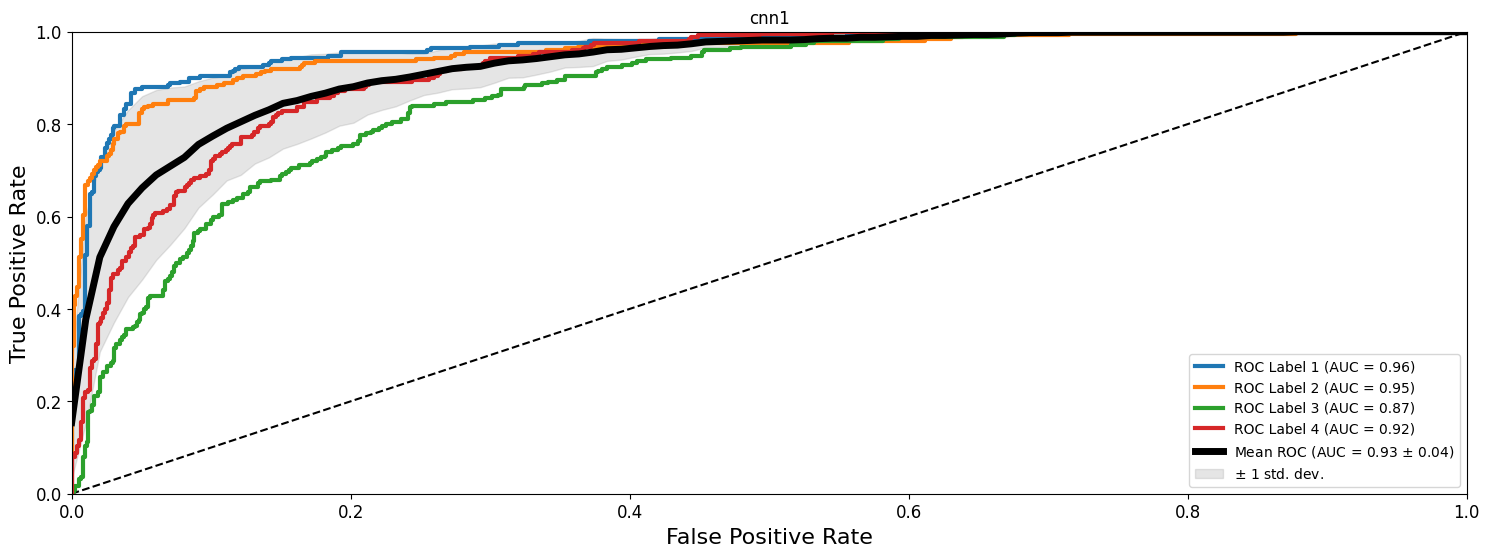

In [72]:
from sklearn.preprocessing import label_binarize
Y_prob_B = cnn2.predict(X_test1)
# convert the output vector into a matrix of binary columns. This is neede2,14,15,1d to compute the ROC curve
Y_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
Fpr_mean = np.linspace(0, 1, 100)
tpr_mean = []
Fpr = []
Tpr = []
AUC = []
for i in range(0,4):
    fpr, tpr, T = roc_curve(Y_bin[:,i], Y_prob_B[:,i])
    AUC.append(roc_auc_score(Y_bin[:,i], Y_prob_B[:,i]))
    Fpr.append(fpr)
    Tpr.append(tpr)
    
    # add an interpolated version of Tpr for the mean ROC curve
    tpr_mean.append(np.interp(Fpr_mean, fpr, tpr))

Tpr_mean = np.mean(tpr_mean, axis=0)
Tpr_stdv = np.std(tpr_mean, axis=0)

mean_auc = auc(Fpr_mean, Tpr_mean)
std_auc = np.std(AUC)

# make the plot: frame
plt.figure(1, figsize=(18, 6))
plt.clf()
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('cnn1')
for i in range(0,4):
    plt.plot(Fpr[i],Tpr[i], linewidth=3, label=r'ROC Label %d (AUC = %0.2f)' % (i+1,AUC[i]))

# plot the average ROC curve
plt.plot(Fpr_mean, Tpr_mean, color='k', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), linewidth=5)

# plot the backround +/- SD around the average ROC curve
UB = np.minimum(Tpr_mean + Tpr_stdv, 1)
LB = np.maximum(Tpr_mean - Tpr_stdv, 0)
plt.fill_between(Fpr_mean, LB, UB, color='grey', alpha=0.2, label=r'$\pm$ 1 std. dev.')
plt.legend(loc="lower right")

3) CNN1

In [ ]:
cnn1 = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding="same", input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(2, strides=2, padding="valid"),
    keras.layers.Flatten(), 
    keras.layers.Dense(160, activation="relu", kernel_initializer="lecun_normal"), 
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5), 
    keras.layers.Dense(160, activation="relu", kernel_initializer="lecun_normal"), 
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4, activation="softmax")])

# compile the network model: this step will configure the learning process
cnn1.compile(loss="sparse_categorical_crossentropy",optimizer="nadam",metrics=["accuracy"])

# print out the structure of the network
cnn1.summary()

# plot the structure of the network in a graph
keras.utils.plot_model(cnn1, show_shapes=True)

In [ ]:
#tf.debugging.set_log_device_placement(True)

# Train the convolutional network
n_epochs = 15
training_cnn1 = cnn1.fit(X_train1, y_train,
                     epochs=n_epochs,
                     validation_split=0.2,
                     callbacks=[earlystop_cb])

32/32 [==============================] - 1s 18ms/step
CNN1 (Final): ACC = 0.6490


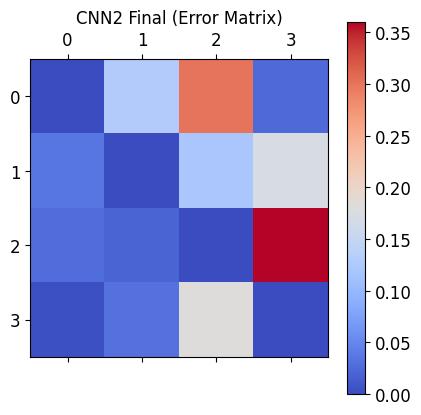

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

Y_pred3 = np.argmax(cnn1.predict(X_test1), axis=-1)
Y_pred_proba3 = cnn1.predict(X_test1)

## Report the accuracy and Error matrix
print('CNN1 (Final): ACC = %1.4f' % (accuracy_score(y_test, Y_pred3)))
    
CM0 = confusion_matrix(y_test, Y_pred3)
CM0 = CM0.astype('float') / CM0.sum(axis=1)[:, np.newaxis]   
np.fill_diagonal(CM0,0)
plt.matshow(CM0, cmap=plt.cm.coolwarm)
plt.title('CNN2 Final (Error Matrix)')
plt.tight_layout
plt.colorbar()
plt.show()

## Let me save the predicted output values and the predicted probability values for future use
with open('repository_design1.npy', 'wb') as f:
    np.save(f, Y_pred3)
    np.save(f, Y_pred_proba3)

32/32 [==============================] - 1s 17ms/step


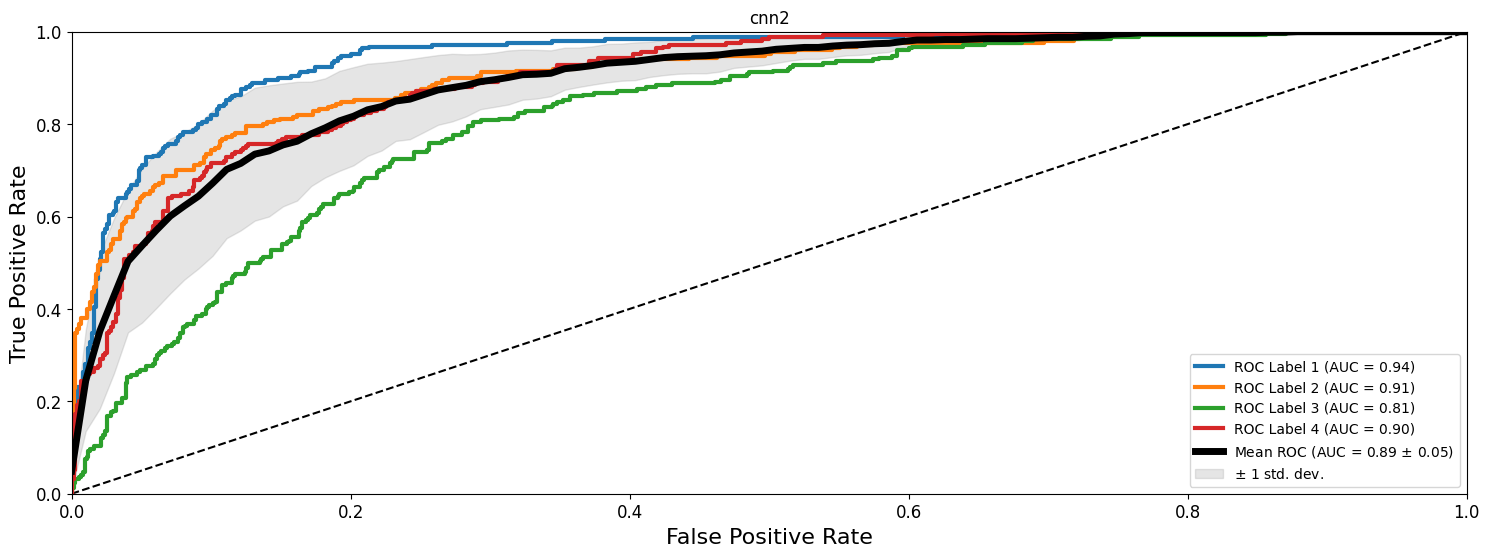

In [77]:
from sklearn.preprocessing import label_binarize
Y_prob_C = cnn1.predict(X_test1)
# convert the output vector into a matrix of binary columns. This is neede2,14,15,1d to compute the ROC curve
Y_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
Fpr_mean = np.linspace(0, 1, 100)
tpr_mean = []
Fpr = []
Tpr = []
AUC = []
for i in range(0,4):
    fpr, tpr, T = roc_curve(Y_bin[:,i], Y_prob_C[:,i])
    AUC.append(roc_auc_score(Y_bin[:,i], Y_prob_C[:,i]))
    Fpr.append(fpr)
    Tpr.append(tpr)
    
    # add an interpolated version of Tpr for the mean ROC curve
    tpr_mean.append(np.interp(Fpr_mean, fpr, tpr))

Tpr_mean = np.mean(tpr_mean, axis=0)
Tpr_stdv = np.std(tpr_mean, axis=0)

mean_auc = auc(Fpr_mean, Tpr_mean)
std_auc = np.std(AUC)

# make the plot: frame
plt.figure(1, figsize=(18, 6))
plt.clf()
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('cnn2')
for i in range(0,4):
    plt.plot(Fpr[i],Tpr[i], linewidth=3, label=r'ROC Label %d (AUC = %0.2f)' % (i+1,AUC[i]))

# plot the average ROC curve
plt.plot(Fpr_mean, Tpr_mean, color='k', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), linewidth=5)

# plot the backround +/- SD around the average ROC curve
UB = np.minimum(Tpr_mean + Tpr_stdv, 1)
LB = np.maximum(Tpr_mean - Tpr_stdv, 0)
plt.fill_between(Fpr_mean, LB, UB, color='grey', alpha=0.2, label=r'$\pm$ 1 std. dev.')
plt.legend(loc="lower right")

4)CNN3

32/32 [==============================] - 9s 290ms/step
DNN (Final): ACC = 0.7710


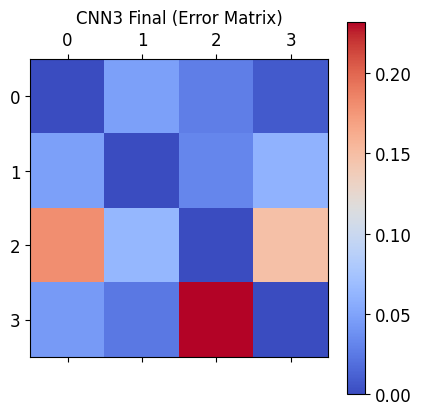

In [89]:
from sklearn.metrics import accuracy_score, confusion_matrix

Y_pred2 = np.argmax(cnn3.predict(X_test1), axis=-1)
Y_pred_proba2 = cnn3.predict(X_test1)

## Report the accuracy and Error matrix
print('DNN (Final): ACC = %1.4f' % (accuracy_score(y_test, Y_pred2)))
    
CM0 = confusion_matrix(y_test, Y_pred2)
CM0 = CM0.astype('float') / CM0.sum(axis=1)[:, np.newaxis]   
np.fill_diagonal(CM0,0)
plt.matshow(CM0, cmap=plt.cm.coolwarm)
plt.title('CNN3 Final (Error Matrix)')
plt.tight_layout
plt.colorbar()
plt.show()

## Let me save the predicted output values and the predicted probability values for future use
with open('repository_design1.npy', 'wb') as f:
    np.save(f, Y_pred2)
    np.save(f, Y_pred_proba2)

32/32 [==============================] - 6s 200ms/step


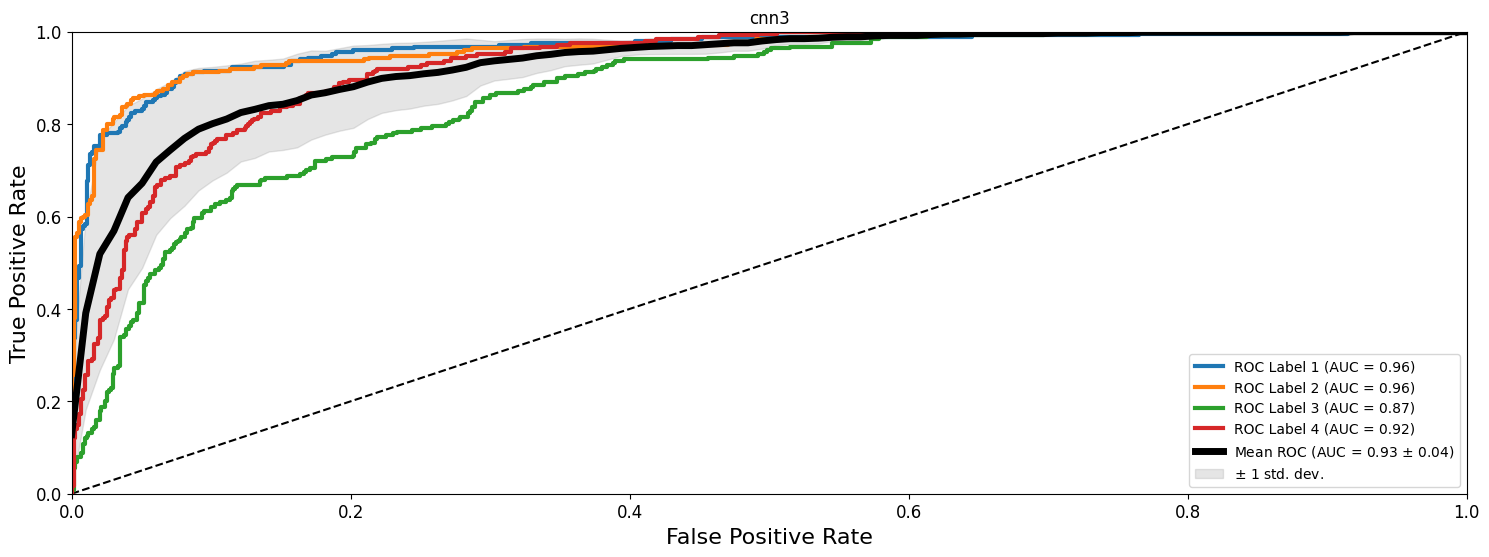

In [91]:
from sklearn.preprocessing import label_binarize
Y_prob_C = cnn3.predict(X_test1)
# convert the output vector into a matrix of binary columns. This is neede2,14,15,1d to compute the ROC curve
Y_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
Fpr_mean = np.linspace(0, 1, 100)
tpr_mean = []
Fpr = []
Tpr = []
AUC = []
for i in range(0,4):
    fpr, tpr, T = roc_curve(Y_bin[:,i], Y_prob_C[:,i])
    AUC.append(roc_auc_score(Y_bin[:,i], Y_prob_C[:,i]))
    Fpr.append(fpr)
    Tpr.append(tpr)
    
    # add an interpolated version of Tpr for the mean ROC curve
    tpr_mean.append(np.interp(Fpr_mean, fpr, tpr))

Tpr_mean = np.mean(tpr_mean, axis=0)
Tpr_stdv = np.std(tpr_mean, axis=0)

mean_auc = auc(Fpr_mean, Tpr_mean)
std_auc = np.std(AUC)

# make the plot: frame
plt.figure(1, figsize=(18, 6))
plt.clf()
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('cnn3')
for i in range(0,4):
    plt.plot(Fpr[i],Tpr[i], linewidth=3, label=r'ROC Label %d (AUC = %0.2f)' % (i+1,AUC[i]))

# plot the average ROC curve
plt.plot(Fpr_mean, Tpr_mean, color='k', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), linewidth=5)

# plot the backround +/- SD around the average ROC curve
UB = np.minimum(Tpr_mean + Tpr_stdv, 1)
LB = np.maximum(Tpr_mean - Tpr_stdv, 0)
plt.fill_between(Fpr_mean, LB, UB, color='grey', alpha=0.2, label=r'$\pm$ 1 std. dev.')
plt.legend(loc="lower right")

5) Pretrained Model

**Final Model: CNN3**

216/216 [==============================] - 22s 101ms/step
DNN (Final): ACC = 0.7721


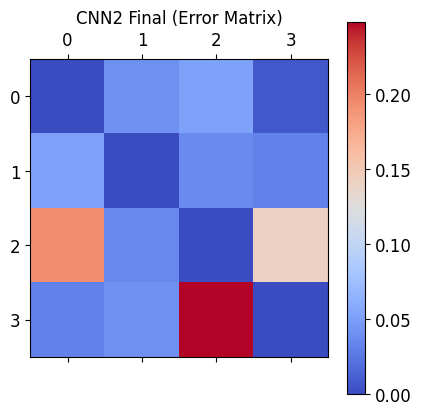

In [92]:
from sklearn.metrics import accuracy_score, confusion_matrix

Y_pred2 = np.argmax(cnn3.predict(X_val1), axis=-1)
Y_pred_proba2 = cnn3.predict(X_val1)

## Report the accuracy and Error matrix
print('DNN (Final): ACC = %1.4f' % (accuracy_score(y_val, Y_pred2)))
    
CM0 = confusion_matrix(y_val, Y_pred2)
CM0 = CM0.astype('float') / CM0.sum(axis=1)[:, np.newaxis]   
np.fill_diagonal(CM0,0)
plt.matshow(CM0, cmap=plt.cm.coolwarm)
plt.title('CNN2 Final (Error Matrix)')
plt.tight_layout
plt.colorbar()
plt.show()

## Let me save the predicted output values and the predicted probability values for future use
with open('repository_design1.npy', 'wb') as f:
    np.save(f, Y_pred2)
    np.save(f, Y_pred_proba2)

216/216 [==============================] - 9s 42ms/step


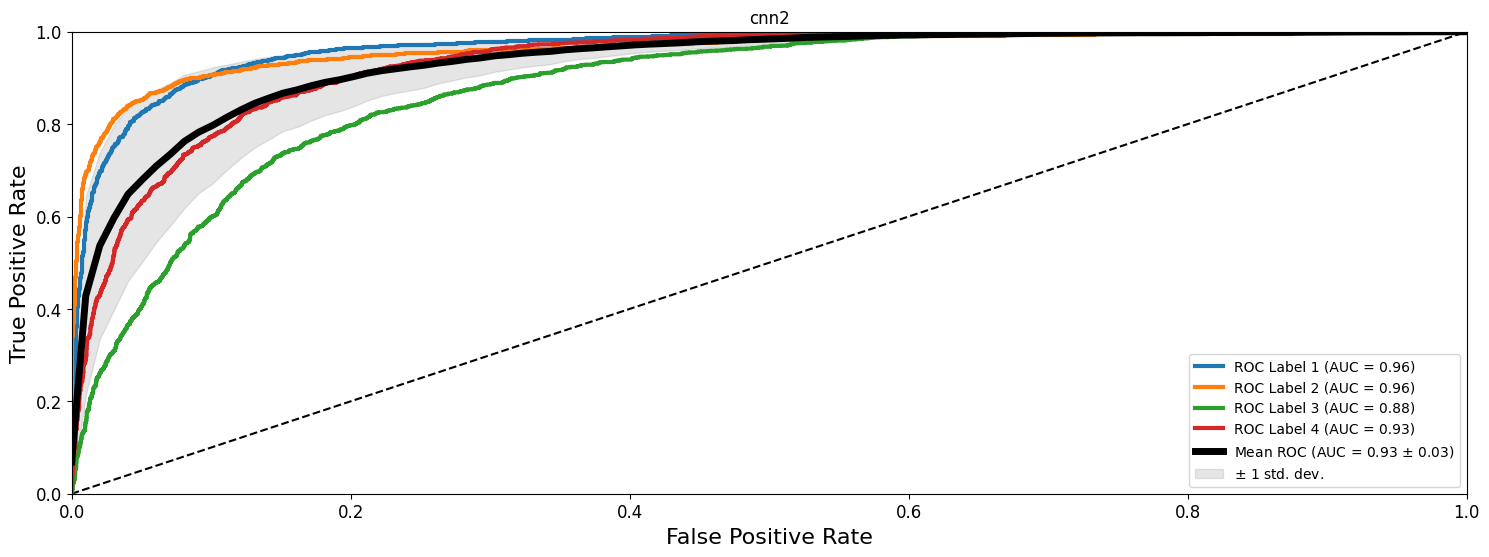

In [79]:
from sklearn.preprocessing import label_binarize
Y_prob_B = cnn3.predict(X_val1)
# convert the output vector into a matrix of binary columns. This is neede2,14,15,1d to compute the ROC curve
Y_bin = label_binarize(y_val, classes=[0, 1, 2, 3])
Fpr_mean = np.linspace(0, 1, 100)
tpr_mean = []
Fpr = []
Tpr = []
AUC = []
for i in range(0,4):
    fpr, tpr, T = roc_curve(Y_bin[:,i], Y_prob_B[:,i])
    AUC.append(roc_auc_score(Y_bin[:,i], Y_prob_B[:,i]))
    Fpr.append(fpr)
    Tpr.append(tpr)
    
    # add an interpolated version of Tpr for the mean ROC curve
    tpr_mean.append(np.interp(Fpr_mean, fpr, tpr))

Tpr_mean = np.mean(tpr_mean, axis=0)
Tpr_stdv = np.std(tpr_mean, axis=0)

mean_auc = auc(Fpr_mean, Tpr_mean)
std_auc = np.std(AUC)

# make the plot: frame
plt.figure(1, figsize=(18, 6))
plt.clf()
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('cnn2')
for i in range(0,4):
    plt.plot(Fpr[i],Tpr[i], linewidth=3, label=r'ROC Label %d (AUC = %0.2f)' % (i+1,AUC[i]))

# plot the average ROC curve
plt.plot(Fpr_mean, Tpr_mean, color='k', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), linewidth=5)

# plot the backround +/- SD around the average ROC curve
UB = np.minimum(Tpr_mean + Tpr_stdv, 1)
LB = np.maximum(Tpr_mean - Tpr_stdv, 0)
plt.fill_between(Fpr_mean, LB, UB, color='grey', alpha=0.2, label=r'$\pm$ 1 std. dev.')
plt.legend(loc="lower right")

Average ROC

216/216 [==============================] - 29s 131ms/step
Shape of Y_prob_F: (6893, 4)
Shape of Y_bin: (6893, 4)


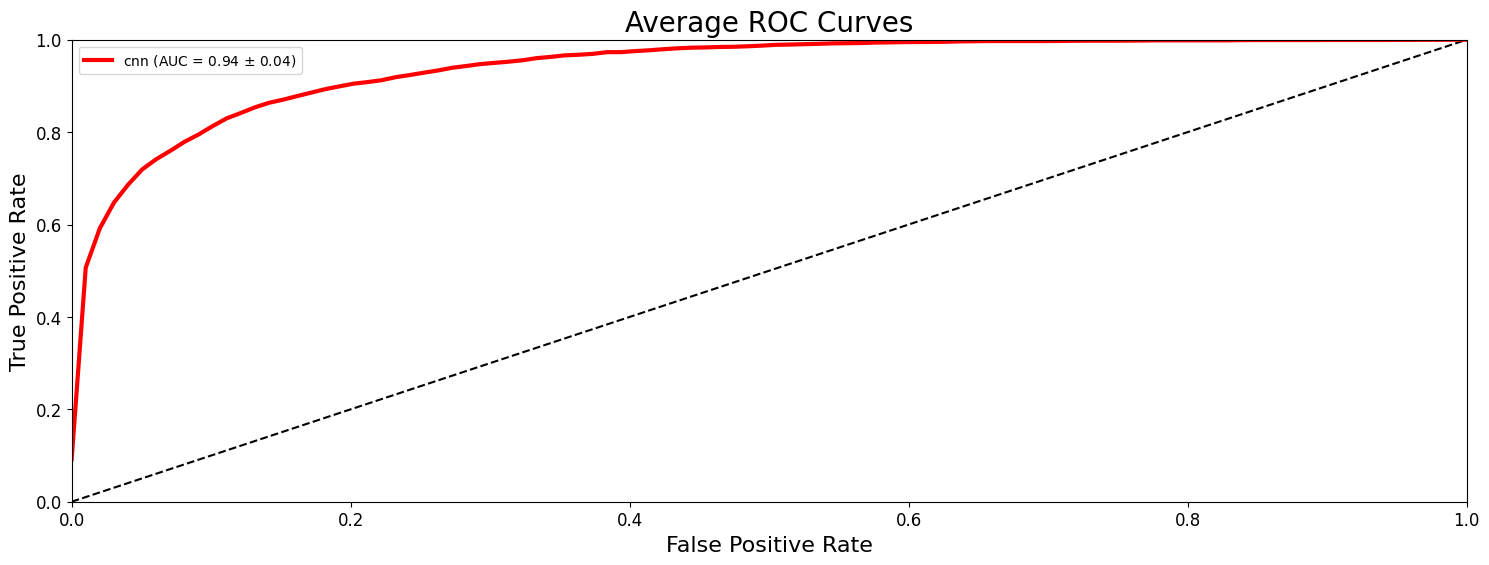

In [93]:
from sklearn.preprocessing import label_binarize
# predict the probability of each digit value for every sample in the test set
Y_prob_F = cnn3.predict(X_val1)


Y_bin = label_binarize(y_val, classes=[0, 1, 2, 3])

# check the size of the matrices
print('Shape of Y_prob_F:',np.shape(Y_prob_F))
print('Shape of Y_bin:',np.shape(Y_bin))

plt.figure(1, figsize=(18, 6))
plt.clf()
plt.plot([0, 1], [0, 1],'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Average ROC Curves', fontsize=20)
Fpr_mean = np.linspace(0, 1, 100)


classifier = Y_prob_F
labelval = 'cnn'
colorval = 'r'
tpr_mean = []
AUC = []
for i in range(0,3):
        fpr, tpr, T = roc_curve(Y_bin[:,i], classifier[:,i])
        AUC.append(roc_auc_score(Y_bin[:,i], classifier[:,i]))
        tpr_mean.append(np.interp(Fpr_mean, fpr, tpr))
Tpr_mean = np.mean(tpr_mean, axis=0)
mean_auc = auc(Fpr_mean, Tpr_mean)
std_auc = np.std(AUC)
plt.plot(Fpr_mean, Tpr_mean, color=colorval, label=r'%s (AUC = %0.2f $\pm$ %0.2f)' % (labelval,mean_auc, std_auc), 
             linewidth=3)
plt.legend()
plt.show()

In [84]:
Y_predF = np.argmax(cnn2.predict(X_val1), axis=-1)
acc2 = accuracy_score(y_val, Y_predF)
pre2 = precision_score(y_val,Y_predF , average= 'macro')
rec2 = recall_score(y_val,Y_predF , average='macro')
f12= f1_score(y_val, Y_predF, average= 'macro')

print(acc2, pre2, rec2, f12)

216/216 [==============================] - 7s 31ms/step
0.762077469896997 0.7576916566747163 0.7620639889148183 0.7571714847592917


Previous Data prepration



---



3    46026
0    33484
1    10213
2     7754
Name: Class, dtype: int64


<Axes: title={'center': 'Train Data'}>

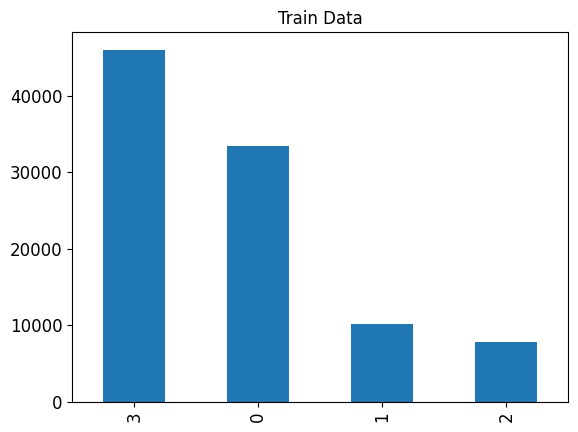

In [ ]:
train_labels_df = pd.DataFrame(train_labels, columns = ['Class'])
print(train_labels_df['Class'].value_counts())
train_labels_df['Class'].value_counts().plot(kind='bar', title = 'Train Data')

3    250
2    250
0    250
1    250
Name: Class, dtype: int64


<Axes: title={'center': 'Test Data'}>

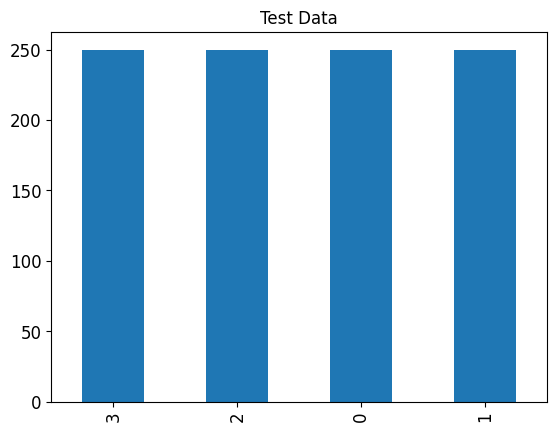

In [ ]:
test_labels_df = pd.DataFrame(test_labels, columns = ['Class'])
print(test_labels_df['Class'].value_counts())
test_labels_df['Class'].value_counts().plot(kind='bar', title = 'Test Data')

3    5114
0    3721
1    1135
2     862
Name: Class, dtype: int64


<Axes: title={'center': 'val Data'}>

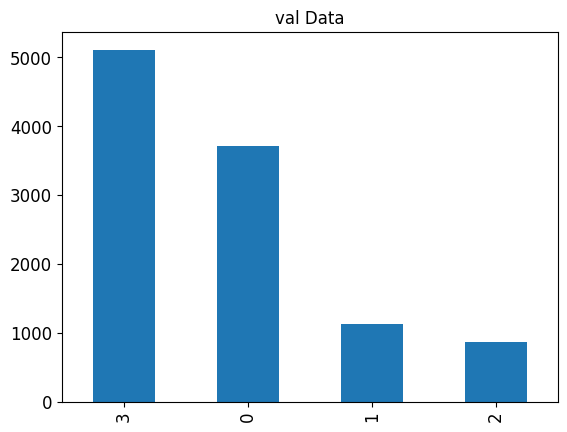

In [ ]:
val_labels_df = pd.DataFrame(val_labels, columns = ['Class'])
print(val_labels_df['Class'].value_counts())
val_labels_df['Class'].value_counts().plot(kind='bar', title = 'val Data')

Splitting Train labels

In [ ]:
Idx_Train_0=list(np.where(train_labels_df['Class'] == 0))
Idx_Train_1=list(np.where(train_labels_df['Class'] == 1))
Idx_Train_2=list(np.where(train_labels_df['Class'] == 2))
Idx_Train_3=list(np.where(train_labels_df['Class'] == 3))

In [ ]:
train_images_0= []
train_labels_0= []
for i in Idx_Train_0:
     train_images_0.append(train_images[i,:,:])
     train_labels_0.append(train_labels[i,:])
print(np.shape(train_images_0))
train_images_0=np.squeeze(train_images_0)
print(np.shape(train_images_0))
##
train_images_1= []
train_labels_1= []
for i in Idx_Train_1:
     train_images_1.append(train_images[i,:,:])
     train_labels_1.append(train_labels[i,:])
print(np.shape(train_images_1))
train_images_1=np.squeeze(train_images_1)
print(np.shape(train_images_1))
##
train_images_2= []
train_labels_2= []
for i in Idx_Train_2:
     train_images_2.append(train_images[i,:,:])
     train_labels_2.append(train_labels[i,:])
print(np.shape(train_images_2))
train_images_2=np.squeeze(train_images_2)
print(np.shape(train_images_2))
##
train_images_3= []
train_labels_3= []
for i in Idx_Train_3:
     train_images_3.append(train_images[i,:,:])
     train_labels_3.append(train_labels[i,:])
print(np.shape(train_images_3))
train_images_3=np.squeeze(train_images_3)
print(np.shape(train_images_3))

(1, 33484, 28, 28)
(33484, 28, 28)
(1, 10213, 28, 28)
(10213, 28, 28)
(1, 7754, 28, 28)
(7754, 28, 28)
(1, 46026, 28, 28)
(46026, 28, 28)


In [ ]:
train_labels_0=np.squeeze(train_labels_0)
train_labels_1=np.squeeze(train_labels_1)
train_labels_2=np.squeeze(train_labels_2)
train_labels_3=np.squeeze(train_labels_3)


Text(0.5, 1.0, 'Normal_3')

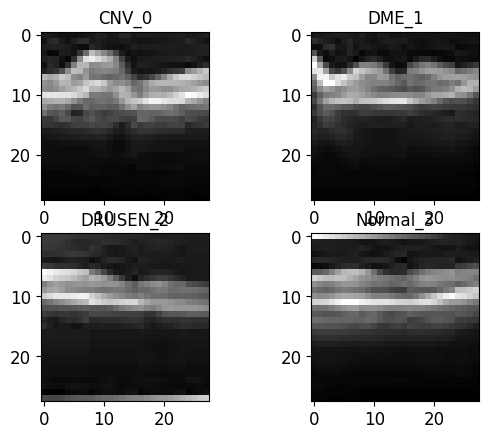

In [ ]:
plt.subplot(2, 2, 1)
plt.imshow(train_images_0[1,:,:], cmap='gray')
plt.title('CNV_0')
plt.subplot(2, 2, 2)
plt.imshow(train_images_1[1,:,:], cmap='gray')
plt.title('DME_1')
plt.subplot(2, 2, 3)
plt.imshow(train_images_2[1,:,:], cmap='gray')
plt.title('DRUSEN_2')
plt.subplot(2, 2, 4)
plt.imshow(train_images_3[1,:,:], cmap='gray')
plt.title('Normal_3')

Concatenating all datset

Making uniform histogram for train

In [ ]:
train_images_0 = train_images_0[0:7754,:,:]
train_images_1 = train_images_1[0:7754,:,:]
train_images_2 = train_images_2[0:7754,:,:]
train_images_3 = train_images_3[0:7754,:,:]

In [ ]:
train_labels_0 = train_labels_0[0:7754]
train_labels_1 = train_labels_1[0:7754]
train_labels_2 = train_labels_2[0:7754]
train_labels_3 = train_labels_3[0:7754]

Concatenate classes

In [ ]:
train_images_n= np.concatenate((train_images_0, train_images_1, train_images_2, train_images_3), axis=0)
print(np.shape(train_images_n))
train_labels_n= np.concatenate((train_labels_0, train_labels_1, train_labels_2, train_labels_3), axis=0)
print(np.shape(train_labels_n))

(31016, 28, 28)
(31016,)


In [ ]:
x_train = train_images_n
y_train = train_labels_n

x_test = test_images
y_test = test_labels

x_val = val_images
y_val = val_labels

Shuffle

In [ ]:
shuffle_index = np.random.permutation(31016)
X_train, y_train =x_train[shuffle_index, :], y_train[shuffle_index]

3    7754
1    7754
2    7754
0    7754
Name: Class, dtype: int64


<Axes: title={'center': 'Train Data'}>

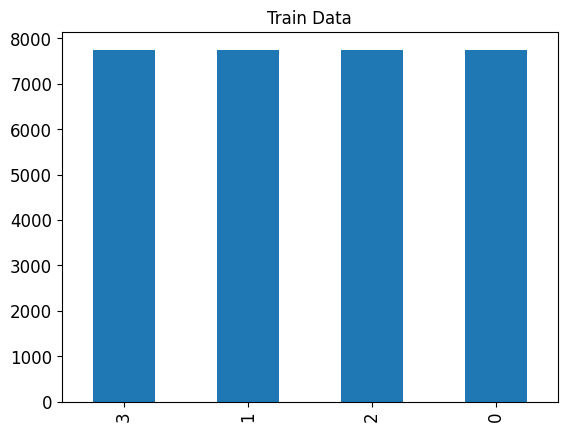

In [ ]:
train_labels_df = pd.DataFrame(y_train, columns = ['Class'])
print(train_labels_df['Class'].value_counts())
train_labels_df['Class'].value_counts().plot(kind='bar', title = 'Train Data')



---

